In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

In [3]:
from utils import load_mnist
from trainer import Trainer

In [4]:
def show_image(x):
    if x.dim() == 1:
        x = x.view(int(x.size(0) ** .5), -1)
        
    plt.imshow(x, cmap = 'gray')
    plt.show()

In [5]:
from argparse import Namespace

config = {
    'train_ratio' : .8,
    'batch_size' : 256,
    'n_epochs' : 50,
    'verbose' : 1,
    'btl_size' : 2
}

config = Namespace(**config)

print(config)

Namespace(train_ratio=0.8, batch_size=256, n_epochs=50, verbose=1, btl_size=2)


In [7]:
train_x, train_y = load_mnist(flatten=True)
test_x, test_y = load_mnist(is_train=False, flatten = True)

train_cnt = int(train_x.size(0) * config.train_ratio)
valid_cnt = train_x.size(0) - train_cnt

# Shuffle dataset to split into train/valid set.
indices = torch.randperm(train_x.size(0))
train_x, valid_x = torch.index_select(
    train_x,
    dim = 0,
    index = indices
).split([train_cnt, valid_cnt], dim = 0)
train_y, valid_y = torch.index_select(
    train_y,
    dim = 0,
    index = indices
).split([train_cnt, valid_cnt], dim = 0)

print('Train:', train_x.shape, train_y.shape)
print('Valid:', valid_x.shape, valid_y.shape)
print('Test:', test_x.shape, test_y.shape)

Train: torch.Size([48000, 784]) torch.Size([48000])
Valid: torch.Size([12000, 784]) torch.Size([12000])
Test: torch.Size([10000, 784]) torch.Size([10000])


In [8]:
from model import Autoencoder

In [9]:
model = Autoencoder(btl_size = config.btl_size)
optimizer = optim.Adam(model.parameters())
crit = nn.MSELoss()

trainer = Trainer(model, optimizer, crit)

In [10]:
trainer.train((train_x, train_x), (valid_x, valid_x), config)

Epoch(1/50): train_loss = 7.3066e-02 valid_loss = 4.8975e-02 lowest_loss = 4.8975e-02
Epoch(2/50): train_loss = 4.7009e-02 valid_loss = 4.5328e-02 lowest_loss = 4.5328e-02
Epoch(3/50): train_loss = 4.4493e-02 valid_loss = 4.3358e-02 lowest_loss = 4.3358e-02
Epoch(4/50): train_loss = 4.3125e-02 valid_loss = 4.1964e-02 lowest_loss = 4.1964e-02
Epoch(5/50): train_loss = 4.2212e-02 valid_loss = 4.1874e-02 lowest_loss = 4.1874e-02
Epoch(6/50): train_loss = 4.1571e-02 valid_loss = 4.0454e-02 lowest_loss = 4.0454e-02
Epoch(7/50): train_loss = 4.1018e-02 valid_loss = 4.0029e-02 lowest_loss = 4.0029e-02
Epoch(8/50): train_loss = 4.0742e-02 valid_loss = 4.0001e-02 lowest_loss = 4.0001e-02
Epoch(9/50): train_loss = 4.0740e-02 valid_loss = 3.9467e-02 lowest_loss = 3.9467e-02
Epoch(10/50): train_loss = 4.0103e-02 valid_loss = 3.8870e-02 lowest_loss = 3.8870e-02
Epoch(11/50): train_loss = 3.9779e-02 valid_loss = 3.9118e-02 lowest_loss = 3.8870e-02
Epoch(12/50): train_loss = 3.9724e-02 valid_loss = 3

# Mean value in each space

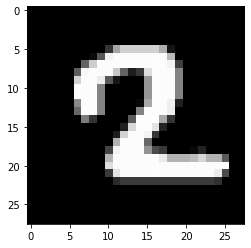

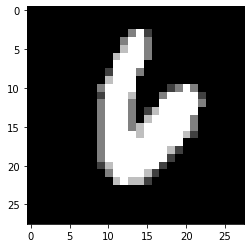

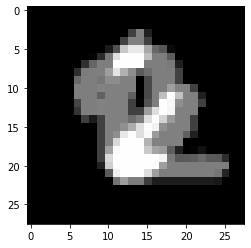

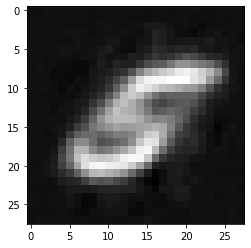

In [11]:
with torch.no_grad():
    import random
    
    index1 = int(random.random() * test_x.size(0))
    index2 = int(random.random() * test_x.size(0))
    
    z1 = model.encoder(test_x[index1].view(1, -1))
    z2 = model.encoder(test_x[index2].view(1, -1))
    
    recon = model.decoder((z1+z2) / 2).squeeze()
    
    show_image(test_x[index1])
    show_image(test_x[index2])
    show_image((test_x[index1] + test_x[index2]) / 2)
    show_image(recon)